In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1043, in launch_instance
    app.start()
  File "C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 725, in start
    self.io_loop.start(

AttributeError: _ARRAY_API not found

In [2]:
df=pd.read_csv("C:\Class_Notes\Machine Learning\Time Series Forecasting\AirPassengers.csv")

In [3]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df=pd.read_csv("C:\Class_Notes\Machine Learning\Time Series Forecasting\AirPassengers.csv",parse_dates=True,index_col='Month')

In [5]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
import matplotlib.pyplot as plt
rcParams = plt.rcParams
rcParams['figure.figsize']  = 15, 8

<Axes: xlabel='Month'>

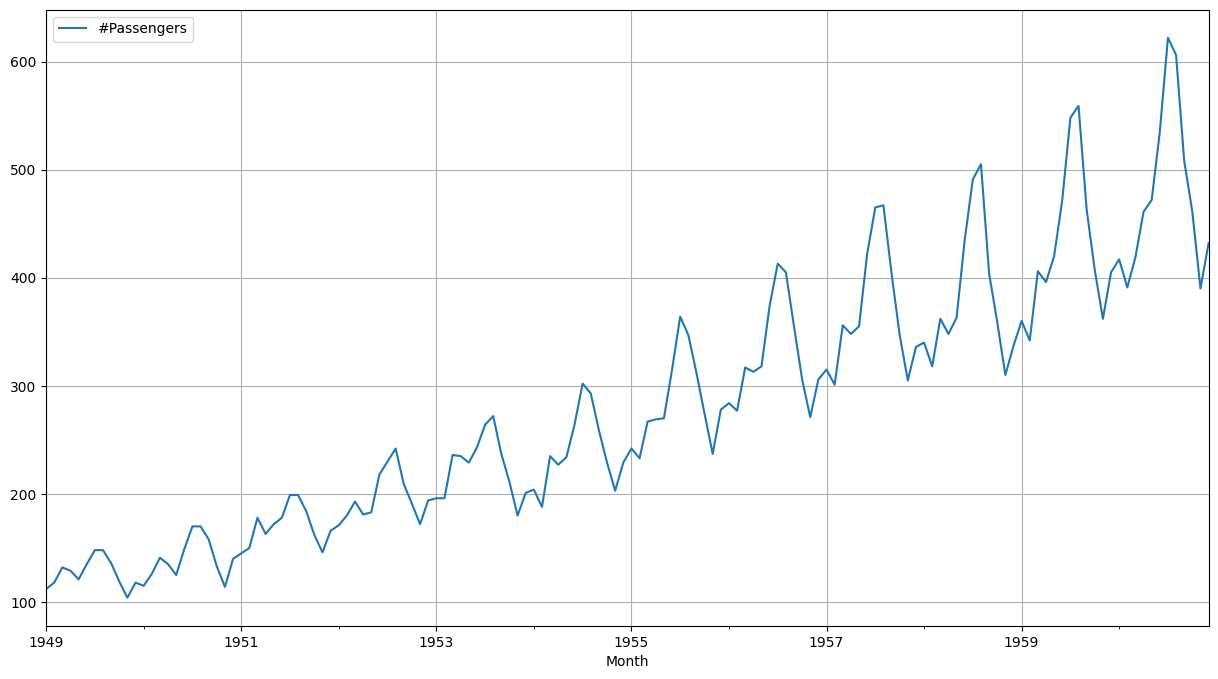

In [7]:
df.plot(grid=True)

In [8]:
# In this data there is level, trend and seasonality is there upward trend and seasonality bcz there is up and down pics are there. 

In [9]:
# Simple exponential will work on data which has no trend and no seasonality

In [10]:
df

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## Decomposition of Time Series

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

### Additive

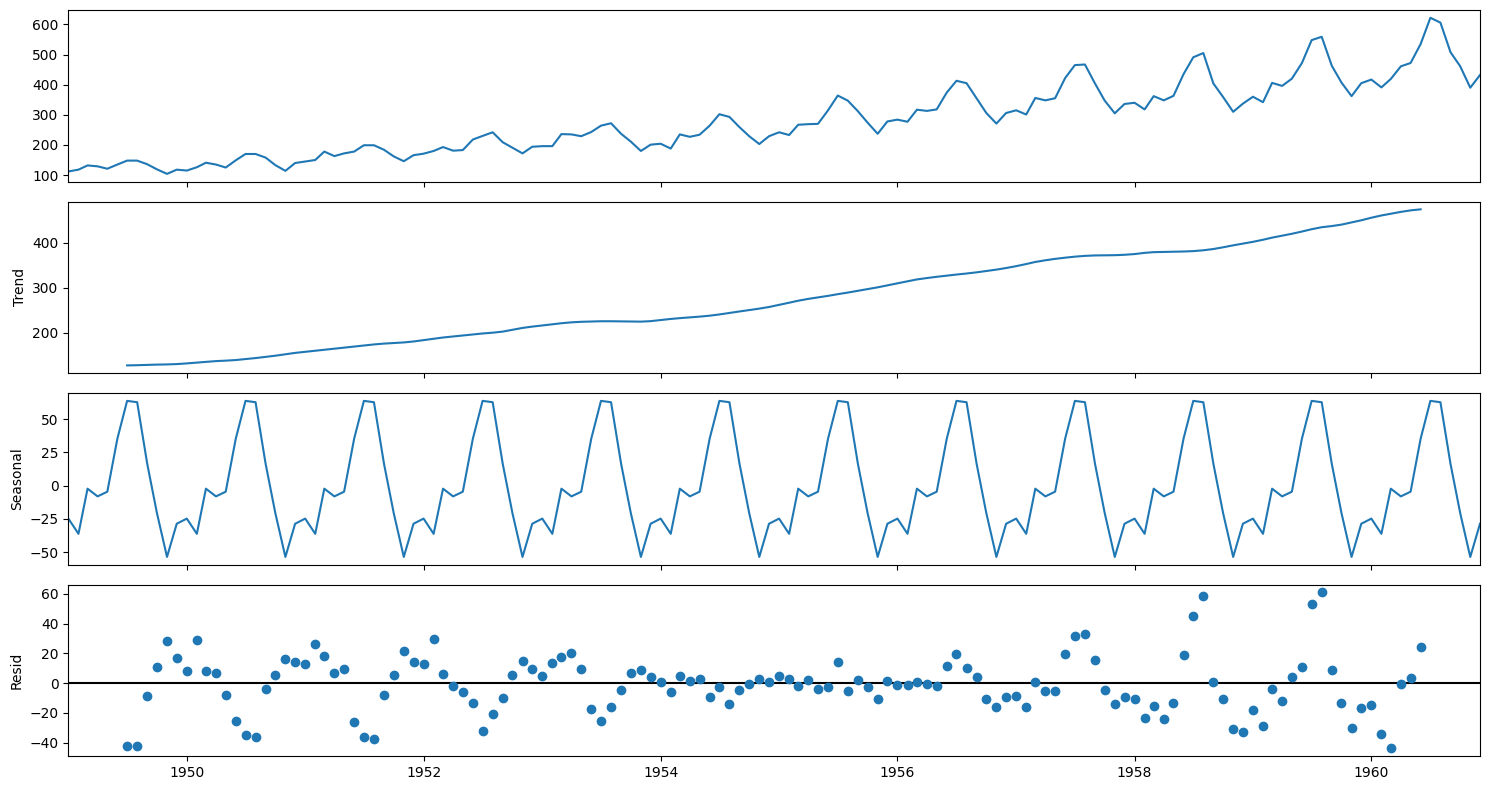

In [12]:
decomposition = seasonal_decompose(df, model='additive')
decomposition.plot();

In [13]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print(trend)
print(seasonality)
print(residual)

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64
Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64
Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64


### Multiplicative

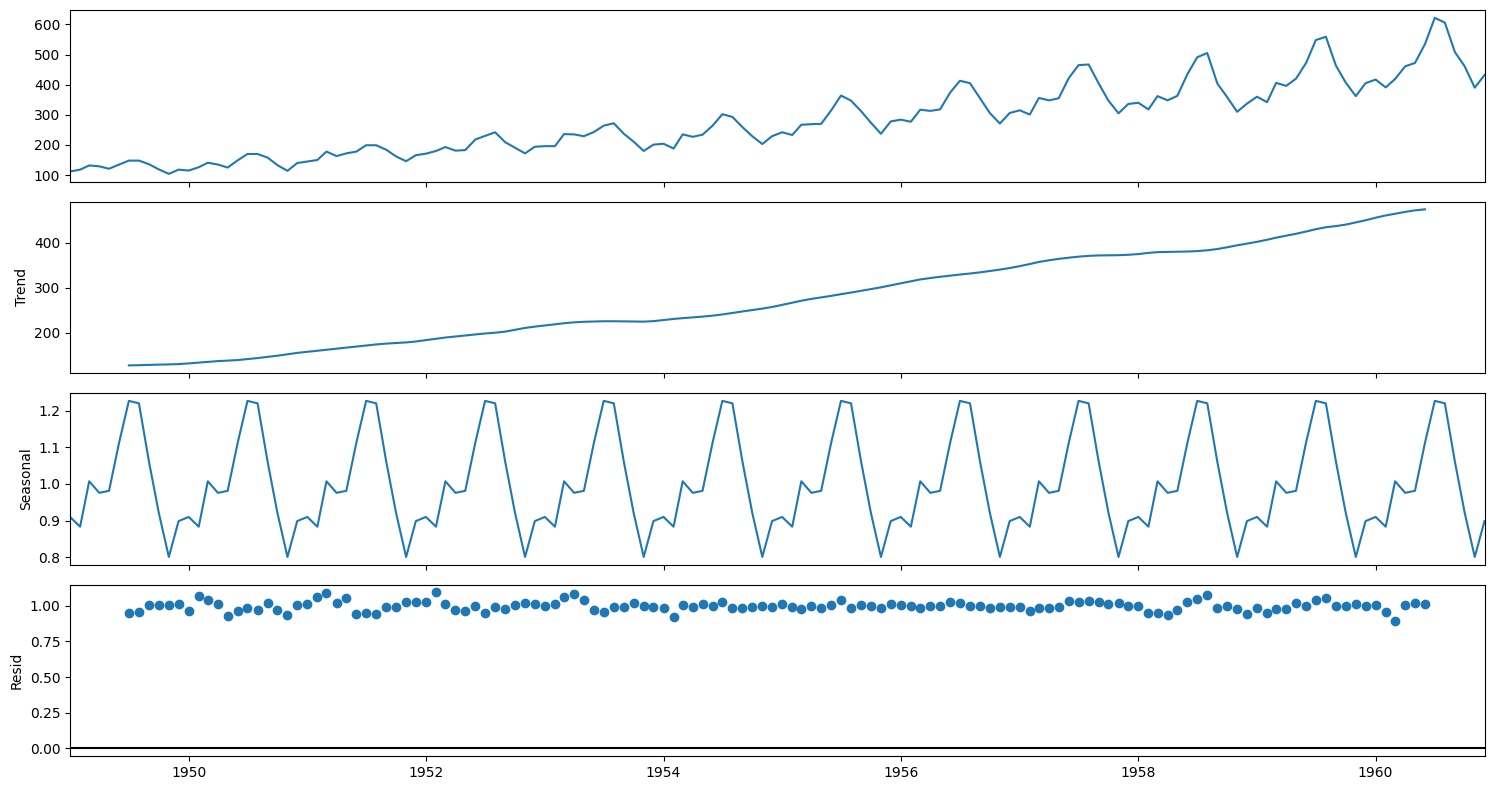

In [14]:
decomposition = seasonal_decompose(df, model='multiplicative')
decomposition.plot();

### Here the multiplicative model is good bcz there is pattern in the residual and in the additive mode there is some noise in the data it follows the pattern but some points are noise points.

In [15]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print(trend)
print(seasonality)
print(residual)

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64
Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64
Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64


In [16]:
trend_mul = decomposition.trend
seasonality_mul = decomposition.seasonal
residual_mul = decomposition.resid
print(trend_mul.head(50),'\n',seasonality_mul.head(50),'\n', residual_mul.head(50))

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
1950-04-01    136.416667
1950-05-01    137.416667
1950-06-01    138.750000
1950-07-01    140.916667
1950-08-01    143.166667
1950-09-01    145.708333
1950-10-01    148.416667
1950-11-01    151.541667
1950-12-01    154.708333
1951-01-01    157.125000
1951-02-01    159.541667
1951-03-01    161.833333
1951-04-01    164.125000
1951-05-01    166.666667
1951-06-01    169.083333
1951-07-01    171.250000
1951-08-01    173.583333
1951-09-01    175.458333
1951-10-01    176.833333
1951-11-01    178.041667
1951-12-01    180.166667
1952-01-01    183.125000
1952-02-01    186.208333
1952-03-01    189.041667
1952-04-01    191.2

#### Decomposition helps you determine whether to apply double or triple exponential smoothing and ensures that each component (trend and seasonality) is appropriately modeled.

#### Decomposition is used to understand the data like trend,sessonality and residual.

In [17]:
# total data is 144 so 30% of this data is around 42 so we will take if year greater than 1957 take test and less than data take train data.

In [18]:
train = df[df.index<='1957']
test = df[df.index>'1957']

In [19]:
print('Training Data')
display(train)
print('Test Data')
display(test)

Training Data


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1956-09-01,355
1956-10-01,306
1956-11-01,271


Test Data


,#Passengers
Month,
1957-02-01,301
1957-03-01,356
1957-04-01,348
1957-05-01,355
1957-06-01,422
1957-07-01,465
1957-08-01,467
1957-09-01,404
1957-10-01,347


In [20]:
model_SES = SimpleExpSmoothing(train,initialization_method= 'estimated')

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
model_SES_autofit = model_SES.fit(optimized=True)

### Model params

In [22]:
model_SES_autofit.params
# smoothing level is alpha
# this params we use in the equation of Simple exponential smoothing in that equation we want the initial level we want the alpha.

{'smoothing_level': np.float64(0.9999999850970092),
 'smoothing_trend': np.float64(nan),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(111.9998320543273),
 'initial_trend': np.float64(nan),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [23]:
# here we predict the values in the test data.
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1957-02-01    315.0
1957-03-01    315.0
1957-04-01    315.0
1957-05-01    315.0
1957-06-01    315.0
1957-07-01    315.0
1957-08-01    315.0
1957-09-01    315.0
1957-10-01    315.0
1957-11-01    315.0
1957-12-01    315.0
1958-01-01    315.0
1958-02-01    315.0
1958-03-01    315.0
1958-04-01    315.0
1958-05-01    315.0
1958-06-01    315.0
1958-07-01    315.0
1958-08-01    315.0
1958-09-01    315.0
1958-10-01    315.0
1958-11-01    315.0
1958-12-01    315.0
1959-01-01    315.0
1959-02-01    315.0
1959-03-01    315.0
1959-04-01    315.0
1959-05-01    315.0
1959-06-01    315.0
1959-07-01    315.0
1959-08-01    315.0
1959-09-01    315.0
1959-10-01    315.0
1959-11-01    315.0
1959-12-01    315.0
1960-01-01    315.0
1960-02-01    315.0
1960-03-01    315.0
1960-04-01    315.0
1960-05-01    315.0
1960-06-01    315.0
1960-07-01    315.0
1960-08-01    315.0
1960-09-01    315.0
1960-10-01    315.0
1960-11-01    315.0
1960-12-01    315.0
Freq: MS, dtype: float64

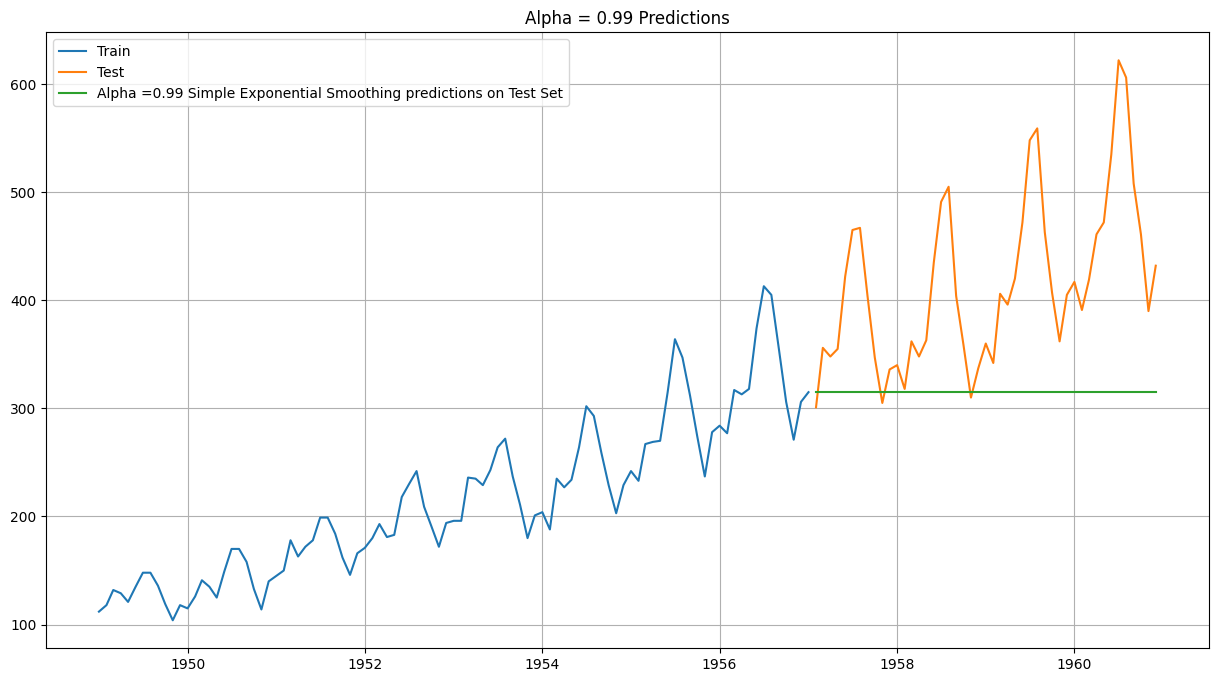

In [24]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

##### here we see by using the simple exponential smoothing it will predict the same numbers and in the plot we see that in the test data which is in orange it is giving the straight line bcz in the SES it is considering that there is no trend and no seasonality in the data thats why it is giving straight line it is not effective model so we try to find the error using MAPE(Mean average percentage error) and  RMSE(Root mean squared error).

In [25]:
def MAPE(y_true,y_pred):
    return np.mean((np.abs(y_true-y_pred))/y_true)*100
# we use the abs bcz we want the absolute value bcz sometime y true is greater than y pred and sometime y pred is greater than y test thats why we use abs here bcz we want the positive value.

In [26]:
# RMSE
mean_squared_error(test.values,SES_predict.values,squared=False)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


np.float64(126.75365631287177)

In [27]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))

SES RMSE: 126.75365631287177


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [28]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf

,Test RMSE
"Alpha=0.99,SES",126.753656


In [29]:
# here we dont know that this RMSE and MAPE is good or not in the case of classification
# we know that if the recall or precision is greater than 80 then this is good model
# but here in this we dont know that this RMSE is good or not so we have to calculate
# RMSE and MAPE for all the models and then we have to compare that.

In [30]:
# for MAPE test.values is the true values and SES_predict.values is the predicted values.
# mean_squared_error(test.values,SES_predict.values,squared=False)

# MAPE formula
# def MAPE(y_true,y_pred):
    # return np.mean((np.abs(y_true-y_pred))/y_true)*100


In [31]:
# In the Simple exponential we see that it is not working properly as we see in the graph green line.

### Double Exponential Smoothing

In [32]:
# In Double Exponential Smoothing it has a factor for trend but not seasonality.

In [33]:
model_DES = Holt(train,initialization_method='estimated').fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [34]:
model_DES.params

{'smoothing_level': np.float64(0.995),
 'smoothing_trend': np.float64(0.0001),
 'smoothing_seasonal': np.float64(nan),
 'damping_trend': nan,
 'initial_level': np.float64(118.46666666666661),
 'initial_trend': np.float64(2.0606060606060677),
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [35]:
# Smoothing_level is alpha, smoothing_trend is beta it is between 0 and 1

In [36]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1957-02-01    317.024751
1957-03-01    319.085024
1957-04-01    321.145296
1957-05-01    323.205569
1957-06-01    325.265841
1957-07-01    327.326113
1957-08-01    329.386386
1957-09-01    331.446658
1957-10-01    333.506931
1957-11-01    335.567203
1957-12-01    337.627476
1958-01-01    339.687748
1958-02-01    341.748021
1958-03-01    343.808293
1958-04-01    345.868565
1958-05-01    347.928838
1958-06-01    349.989110
1958-07-01    352.049383
1958-08-01    354.109655
1958-09-01    356.169928
1958-10-01    358.230200
1958-11-01    360.290472
1958-12-01    362.350745
1959-01-01    364.411017
1959-02-01    366.471290
1959-03-01    368.531562
1959-04-01    370.591835
1959-05-01    372.652107
1959-06-01    374.712379
1959-07-01    376.772652
1959-08-01    378.832924
1959-09-01    380.893197
1959-10-01    382.953469
1959-11-01    385.013742
1959-12-01    387.074014
1960-01-01    389.134286
1960-02-01    391.194559
1960-03-01    393.254831
1960-04-01    395.315104
1960-05-01    397.375376


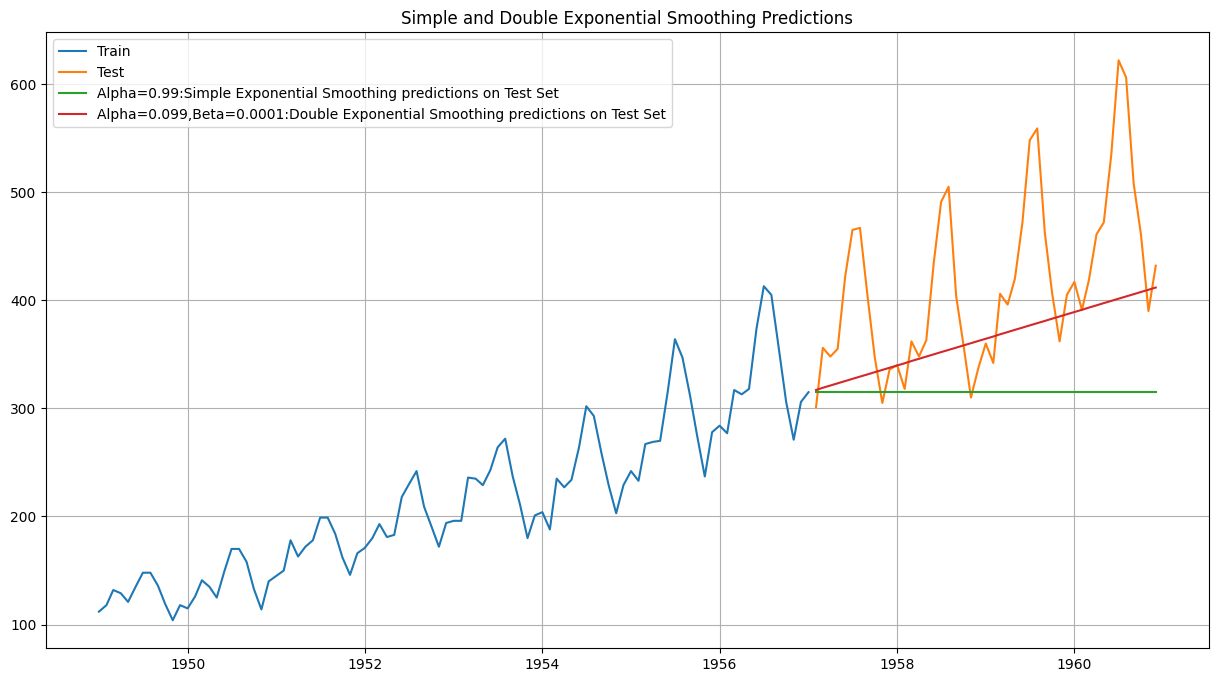

In [37]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [38]:
# Still it is not perfect model beta is 0.0001 means trend is not much required
# just initially the line is straight and now the line is following the trend upward direction.

In [39]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 83.8725094644908


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [40]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=0.997,Beta=0.0001:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Test RMSE
"Alpha=0.99,SES",126.753656
"Alpha=0.997,Beta=0.0001:DES",83.872509


In [41]:
# by using RMSE which model gives the least RMSE that model is good.

## Triple Exponential Smoothning (Holt's Winter Model)

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [43]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated').fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [44]:
model_TES.params
# smoothing_seasonal is the gamma which is the smoothing factor of seasonality.

{'smoothing_level': np.float64(0.2545061904847956),
 'smoothing_trend': np.float64(0.0),
 'smoothing_seasonal': np.float64(0.7454938095152044),
 'damping_trend': nan,
 'initial_level': np.float64(118.80841360794642),
 'initial_trend': np.float64(2.3184366642168595),
 'initial_seasons': array([ -9.12681105,  -3.52686702,   8.95077224,   3.68421298,
         -5.07476701,   9.0306235 ,  21.24972216,  18.82911458,
          4.7024483 , -14.09960998, -28.54136237, -11.93871544]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [45]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

1957-02-01    310.403812
1957-03-01    349.141482
1957-04-01    345.834224
1957-05-01    350.681709
1957-06-01    402.753178
1957-07-01    439.385144
1957-08-01    426.257260
1957-09-01    375.428287
1957-10-01    328.554764
1957-11-01    295.335413
1957-12-01    332.755047
1958-01-01    345.944309
1958-02-01    338.225052
1958-03-01    376.962722
1958-04-01    373.655464
1958-05-01    378.502949
1958-06-01    430.574418
1958-07-01    467.206384
1958-08-01    454.078500
1958-09-01    403.249527
1958-10-01    356.376004
1958-11-01    323.156653
1958-12-01    360.576287
1959-01-01    373.765549
1959-02-01    366.046292
1959-03-01    404.783962
1959-04-01    401.476704
1959-05-01    406.324189
1959-06-01    458.395658
1959-07-01    495.027624
1959-08-01    481.899740
1959-09-01    431.070767
1959-10-01    384.197244
1959-11-01    350.977893
1959-12-01    388.397527
1960-01-01    401.586789
1960-02-01    393.867532
1960-03-01    432.605202
1960-04-01    429.297944
1960-05-01    434.145429


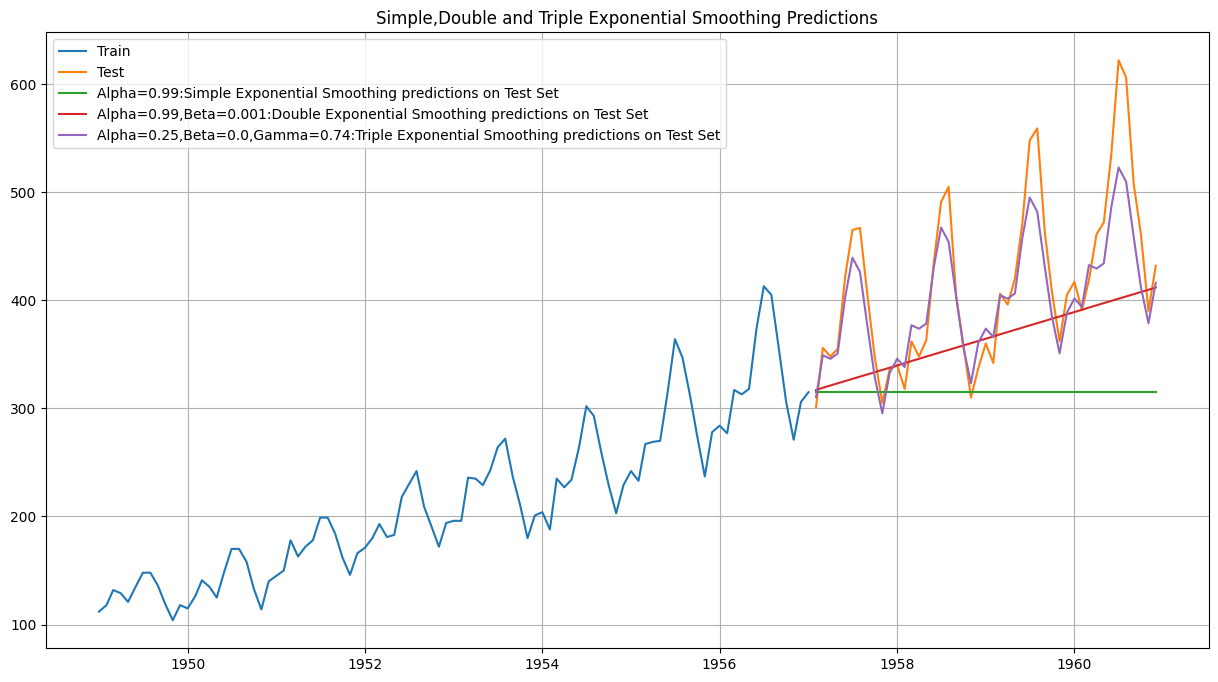

In [46]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');
# here in this graph purple line follows the seasonality it slightly better than double and single exponential smoothing.

TES RMSE: 32.93472392625769


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [48]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Test RMSE
"Alpha=0.99,SES",126.753656
"Alpha=0.997,Beta=0.0001:DES",83.872509
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",32.934724


In [49]:
# Forecasting is the subset of Prediction. Prediction predicts the value but forecasting tells the sales.

# ARIMA Models

In [50]:
from statsmodels.tsa.stattools import adfuller

In [58]:
# We use this function to find the series is stationarity or not
def adf_test(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistics:', result[0])
    print('p-value:',result[1])
    for key, value in result[4].items():
        print(f'Critical Value {key}: {value}')
    if result[1]>0.05:
        print("The series is not statistionary")
    else:
        print("The series is stationary")

In [52]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1956-09-01,355
1956-10-01,306
1956-11-01,271


In [53]:
adf_test(train['#Passengers'])

ADF Statistics: 1.4021854461291767
p-value: 0.9971240474564684
Critical Value 1%: -3.510711795769895
Critical Value 5%: -2.8966159448223734
Critical Value 10%: -2.5854823866213152
The series is not statistionary


In [54]:
# Find the diff and then apply the adf test to find the series is stationarity or not.
train_diff = train['#Passengers'].diff().dropna()

In [55]:
adf_test(train_diff)

ADF Statistics: -2.189195468865145
p-value: 0.2101902227689414
Critical Value 1%: -3.5117123057187376
Critical Value 5%: -2.8970475206326833
Critical Value 10%: -2.5857126912469153
The series is not statistionary


In [56]:
# Find diff 2nd time because in first diff series is not stationarity.
train_diff2 = train_diff.diff().dropna()

In [57]:
adf_test(train_diff2)

ADF Statistics: -11.765052539286788
p-value: 1.1241825271601858e-21
Critical Value 1%: -3.5117123057187376
Critical Value 5%: -2.8970475206326833
Critical Value 10%: -2.5857126912469153
The series is stationary


In [59]:
# Now the series is stationary now we train the arima model

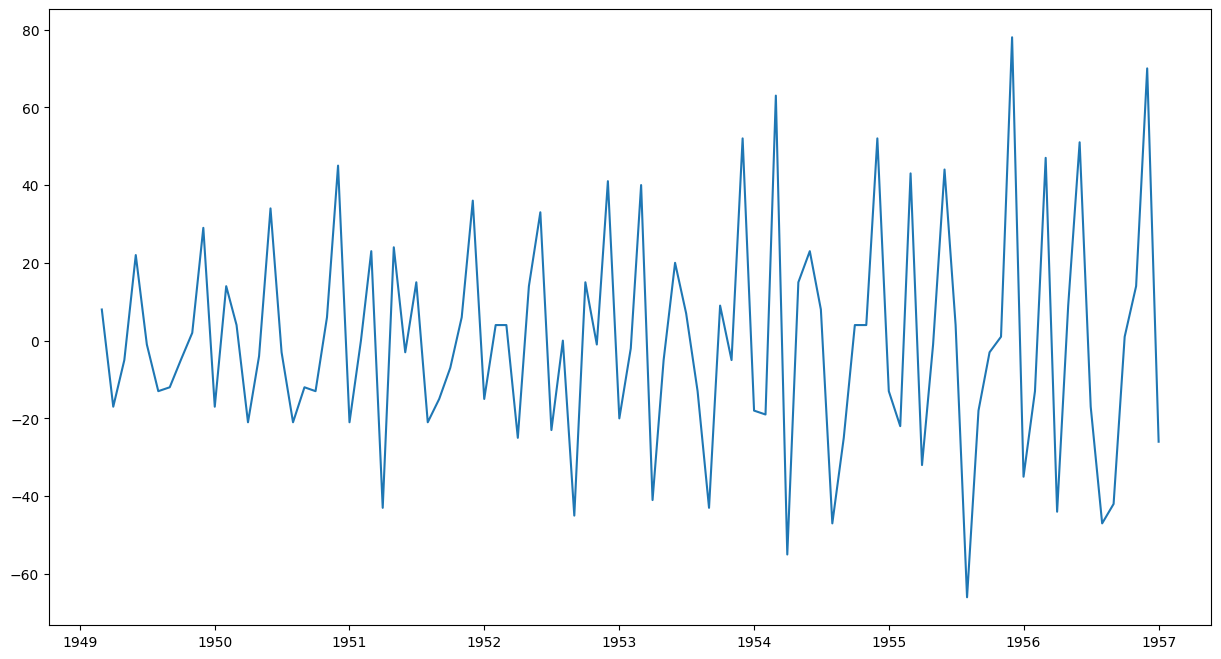

In [61]:
plt.plot(train_diff2)

In [62]:
# We have seasonality in the data but we don't have trend in this data now we conform that the data is stationarity.

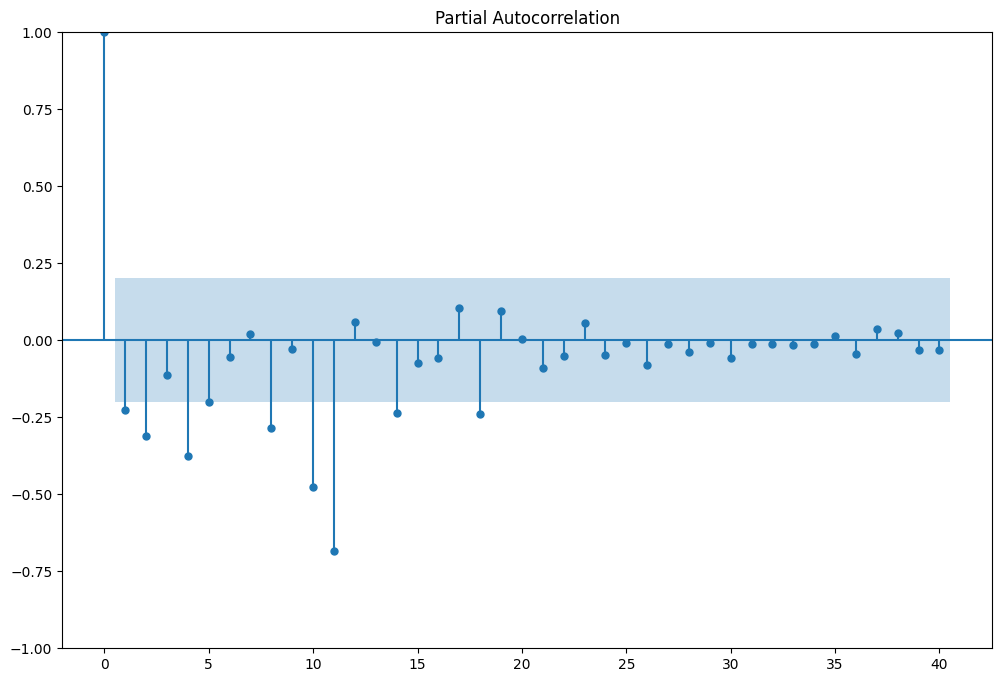

In [64]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.figure(figsize=(12,8))
plot_pacf(train_diff2, lags=40,ax=plt.gca())
plt.show()

In [65]:
# Here from this pacf model we find the p value so here the p value is 2 because the blue region is the cutoff region means inside the blue region there is less correlation so we see that starting 2 points has highere correlation because they comes outside the blue region and 3rd point is the cutoff point means there is less correlation with the previous value so the p value is 2.

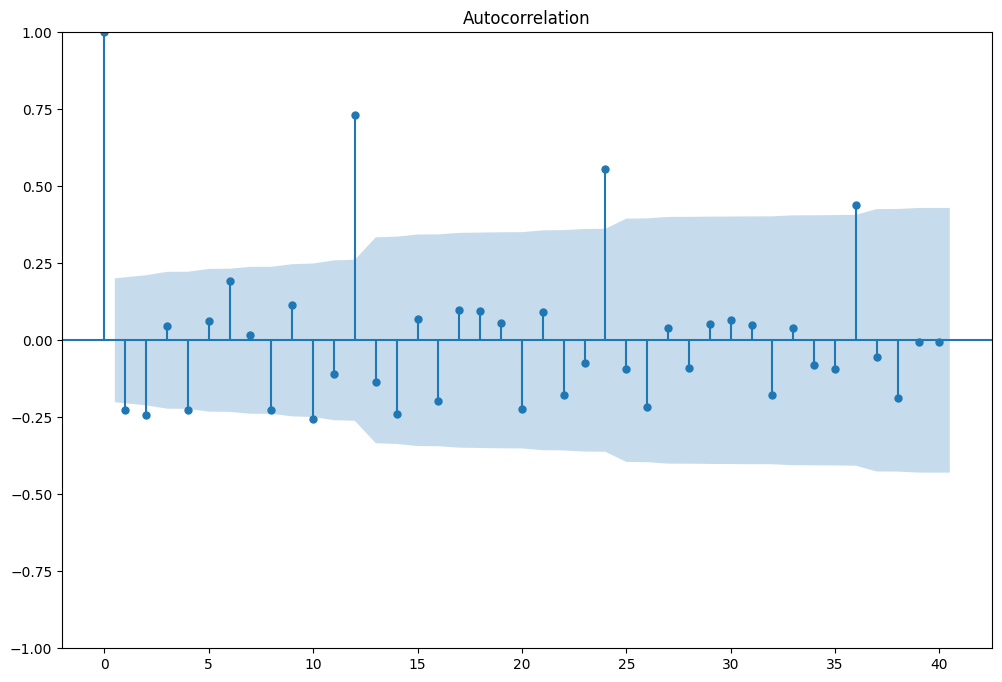

In [66]:
plt.figure(figsize=(12,8))
plot_acf(train_diff2, lags=40,ax=plt.gca())
plt.show()

In [67]:
# here from acf plot we find the value of q so here also the value of q=2 because there is no correlation of 3rd point with the previous value and when we find the less correlation with the previous point at that point we stop.

In [69]:
# d=2 (bcz we do the differencing 2 times)
# p=2
# q=2
# Now we are ready to train the arima model bcz for arima model we want the value of d,p and q.

In [70]:
from statsmodels.tsa.arima.model import ARIMA

In [71]:
model_arima = ARIMA(train_diff2, order=(2,2,2))
arima_result = model_arima.fit()

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals

In [73]:
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                   95
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -444.951
Date:                Sat, 16 Nov 2024   AIC                            899.901
Time:                        23:55:03   BIC                            912.564
Sample:                    03-01-1949   HQIC                           905.014
                         - 01-01-1957                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2727      0.122     -2.239      0.025      -0.511      -0.034
ar.L2         -0.3018      0.126     -2.390      0.017      -0.549      -0.054
ma.L1         -1.9940     17.080     -0.117      0.9

In [74]:
import itertools
p = q = range(0,3)
d = range(0,3)
pdq = list(itertools.product(p,d,q))
print('Examples of parameter combinations for Model...')
print('Model: {}'.format(pdq[0]))
print('Model: {}'.format(pdq[1]))
print('Model: {}'.format(pdq[2]))
print('Model: {}'.format(pdq[3]))

Examples of parameter combinations for Model...
Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 1, 0)


In [84]:
# This is the Grid Search of ARIMA model in the time series we provide the 
# parameters by own here we see that the p and q value is 2 so we use the range 0,3
import itertools
import warnings
warnings.filterwarnings("ignore")

p = d = q = range(0,3)
pdq = list(itertools.product(p,d,q))

best_aic = float("inf")
best_order = None

for order in pdq:
    try:
        model = ARIMA(train_diff2, order = order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order     
    except:
        continue
print(f'Best Arima Order:{best_order} with AIC: {best_aic}')

Best Arima Order:(1, 0, 2) with AIC: 868.57268641189


In [83]:
# here we see according to we(2,2,2) model is best but according to grid search (1,0,2) is the best model.

In [86]:
arima_result.aic

np.float64(899.9014220175974)

In [87]:
# here we see that before grid search the model aic is 899.901 and now after the grid search the aic is 868.572 and (1,0,2) is the order means that 1 means p means each value is related to previous 0 means no differencing 2 means q error value.

In [89]:
test.shape

(47, 1)

In [90]:
# so the test data is 47

In [91]:
pred =  arima_result.forecast(steps=47)

In [92]:
pred

1957-02-01   -14.318112
1957-03-01    11.491550
1957-04-01     0.951414
1957-05-01    -3.940206
1957-06-01     0.597903
1957-07-01     0.859976
1957-08-01    -0.557728
1957-09-01    -0.226912
1957-10-01     0.134044
1957-11-01    -0.040904
1957-12-01    -0.078815
1958-01-01     0.007637
1958-02-01     0.018820
1958-03-01     0.012997
1958-04-01     0.034527
1958-05-01     0.053730
1958-06-01     0.065312
1958-07-01     0.079675
1958-08-01     0.095580
1958-09-01     0.110225
1958-10-01     0.124748
1958-11-01     0.139684
1958-12-01     0.154545
1959-01-01     0.169301
1959-02-01     0.184109
1959-03-01     0.198934
1959-04-01     0.213739
1959-05-01     0.228545
1959-06-01     0.243356
1959-07-01     0.258166
1959-08-01     0.272974
1959-09-01     0.287783
1959-10-01     0.302592
1959-11-01     0.317401
1959-12-01     0.332210
1960-01-01     0.347019
1960-02-01     0.361828
1960-03-01     0.376637
1960-04-01     0.391446
1960-05-01     0.406255
1960-06-01     0.421064
1960-07-01     0

### In ARIMA, AIC stands for Akaike Information Criterion, which is a metric used to determine the order of an ARIMA model and select the best model for a given data set we take the model which has less aic.

In [93]:
# Now find the aic of each model

In [99]:
ARIMA_AIC = pd.DataFrame(columns=['param','AIC'])

In [100]:
for param in pdq:
    ARIMA_model = ARIMA(train_diff2,order = param).fit()
    temp_df = pd.DataFrame({'param':[param], 'AIC':[ARIMA_model.aic]})
    ARIMA_AIC = pd.concat([ARIMA_AIC, temp_df],ignore_index=True)
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))

ARIMA(0, 0, 0) - AIC:909.6941568950898
ARIMA(0, 0, 1) - AIC:877.9978509789662
ARIMA(0, 0, 2) - AIC:869.8573898236963
ARIMA(0, 1, 0) - AIC:983.2042664963586
ARIMA(0, 1, 1) - AIC:905.7148161037784
ARIMA(0, 1, 2) - AIC:879.8217534123016
ARIMA(0, 2, 0) - AIC:1073.1266447476708
ARIMA(0, 2, 1) - AIC:980.2981934434513
ARIMA(0, 2, 2) - AIC:908.1507862371578
ARIMA(1, 0, 0) - AIC:906.6513131897982
ARIMA(1, 0, 1) - AIC:873.26774568905
ARIMA(1, 0, 2) - AIC:868.57268641189
ARIMA(1, 1, 0) - AIC:959.1089727204687
ARIMA(1, 1, 1) - AIC:903.1186046697289
ARIMA(1, 1, 2) - AIC:906.7618535147471
ARIMA(1, 2, 0) - AIC:1031.5151006528345
ARIMA(1, 2, 1) - AIC:957.285474062104
ARIMA(1, 2, 2) - AIC:906.1810529180494
ARIMA(2, 0, 0) - AIC:898.9039568837334
ARIMA(2, 0, 1) - AIC:870.1189719376637
ARIMA(2, 0, 2) - AIC:870.0729291985372
ARIMA(2, 1, 0) - AIC:935.5871706152733
ARIMA(2, 1, 1) - AIC:896.0112342873366
ARIMA(2, 1, 2) - AIC:898.5179446644249
ARIMA(2, 2, 0) - AIC:987.5211638537817
ARIMA(2, 2, 1) - AIC:934.812

In [101]:
# Sort the models based on aic
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
11,"(1, 0, 2)",868.572686
2,"(0, 0, 2)",869.857390
20,"(2, 0, 2)",870.072929
19,"(2, 0, 1)",870.118972
10,"(1, 0, 1)",873.267746
1,"(0, 0, 1)",877.997851
5,"(0, 1, 2)",879.821753
22,"(2, 1, 1)",896.011234
23,"(2, 1, 2)",898.517945
18,"(2, 0, 0)",898.903957


In [102]:
# which told 11th model is the best model because it has the least aic from other models.

In [104]:
rmse = mean_squared_error(test['#Passengers'],pred,squared=False)
print(rmse)

422.52586514503645


In [105]:
resultsDf_temp = pd.DataFrame({'Test RMSE': rmse}
                           ,index=['BEST_ARIMA_MODEL(1,0,2)'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

,Test RMSE
"Alpha=0.99,SES",126.753656
"Alpha=0.997,Beta=0.0001:DES",83.872509
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",32.934724
"BEST_ARIMA_MODEL(1,0,2)",422.525865


In [106]:
# in the smoothning model we see that there is less rmse as compare to arima so it means in this data smoothning model performs better but in most cases arima model is better than smoothing models but here in this data smoothning model is perform best than arima model.

## SARIMA Model